# Full Data Analysis Case-study (Airbnb listings data for London)

### 1] Libraries & Data Importing

##### Import libraries and read in the listings csv file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("listings.csv")

### 2] Data Understanding (Asking Questions)

##### Check the content of the DataFrame

In [3]:
df.sample(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
60816,721641311108919445,Rental unit in Greater London · ★4.84 · 1 bedr...,402267688,Christopher,NaN,Camden,51.528356,-0.121614,Private room,60,1,44,2023-06-08,5.26,36,313,44,NaN
25226,25346064,Rental unit in Greater London · ★4.93 · 1 bedr...,15089987,Luke,NaN,Hackney,51.539350,-0.084890,Private room,30,2,30,2019-11-22,0.53,1,0,0,NaN


##### How many rows and columns are there?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81792 entries, 0 to 81791
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              81792 non-null  int64  
 1   name                            81792 non-null  object 
 2   host_id                         81792 non-null  int64  
 3   host_name                       81786 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   81792 non-null  object 
 6   latitude                        81792 non-null  float64
 7   longitude                       81792 non-null  float64
 8   room_type                       81792 non-null  object 
 9   price                           81792 non-null  int64  
 10  minimum_nights                  81792 non-null  int64  
 11  number_of_reviews               81792 non-null  int64  
 12  last_review                     

### 3] Data Wrangling (Cleaning & Manipulation)

##### Drop unnecessary columns

In [5]:
# df.drop(["id", "name", "host_id", "host_name", "neighbourhood_group", "number_of_reviews", "last_review", "reviews_per_month", "number_of_reviews_ltm", "license"], axis=1, inplace=True)

In [6]:
df=df[["neighbourhood","latitude","longitude","price","minimum_nights","availability_365","room_type","calculated_host_listings_count"]]

#### Examining Changes

In [7]:
df.head()

,neighbourhood,latitude,longitude,price,minimum_nights,availability_365,room_type,calculated_host_listings_count
0,Hackney,51.52748,-0.08172,156,2,4,Entire home/apt,1
1,Westminster,51.48970,-0.13911,83,2,0,Entire home/apt,1
2,Barking and Dagenham,51.54072,0.15246,41,4,365,Private room,1
3,Hammersmith and Fulham,51.48974,-0.22208,69,4,67,Private room,1
4,Islington,51.56861,-0.11270,79,1,353,Private room,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81792 entries, 0 to 81791
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   81792 non-null  object 
 1   latitude                        81792 non-null  float64
 2   longitude                       81792 non-null  float64
 3   price                           81792 non-null  int64  
 4   minimum_nights                  81792 non-null  int64  
 5   availability_365                81792 non-null  int64  
 6   room_type                       81792 non-null  object 
 7   calculated_host_listings_count  81792 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 5.0+ MB


##### Are there any missing / duplicated data?

In [9]:
df.duplicated().value_counts()

False    81697
True        95
dtype: int64

In [10]:
df = df.drop_duplicates()

In [11]:
df.isna().sum()

neighbourhood                     0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
availability_365                  0
room_type                         0
calculated_host_listings_count    0
dtype: int64

### 4] Data Analysis & Visualization (EDA & Statistical Analysis)

#### Examine Continous Variables

In [12]:
df.describe()

,latitude,longitude,price,minimum_nights,availability_365,calculated_host_listings_count
count,81697.000000,81697.000000,81697.000000,81697.000000,81697.000000,81697.000000
mean,51.509639,-0.128060,187.447960,5.653733,119.187522,16.837509
std,0.048560,0.099228,477.647087,23.015686,133.811481,58.675206
min,51.295937,-0.497800,0.000000,1.000000,0.000000,1.000000
25%,51.483550,-0.189150,61.000000,1.000000,0.000000,1.000000
50%,51.513870,-0.126550,110.000000,2.000000,59.000000,1.000000
75%,51.539490,-0.068350,198.000000,4.000000,244.000000,5.000000
max,51.681502,0.288570,58564.000000,1125.000000,365.000000,543.000000


In [13]:
df.describe(include=['object', 'bool'])

,neighbourhood,room_type
count,81697,81697
unique,33,4
top,Westminster,Entire home/apt
freq,9301,50360


#### Get Correlation between different variables

<AxesSubplot:>

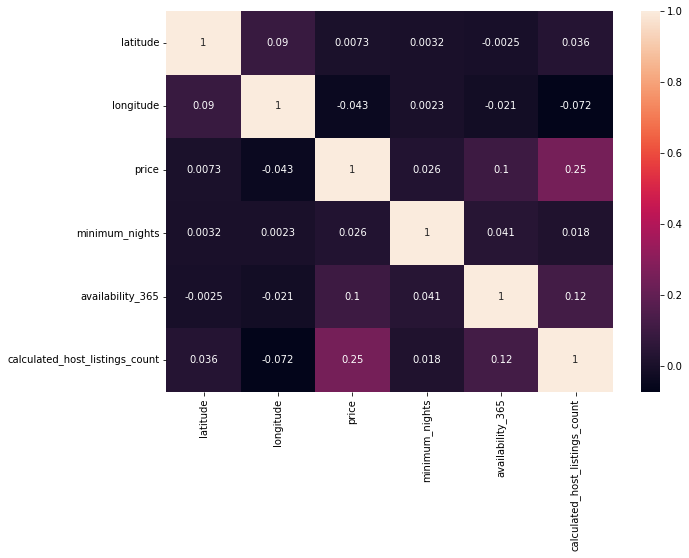

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

#### Multivariate visualization

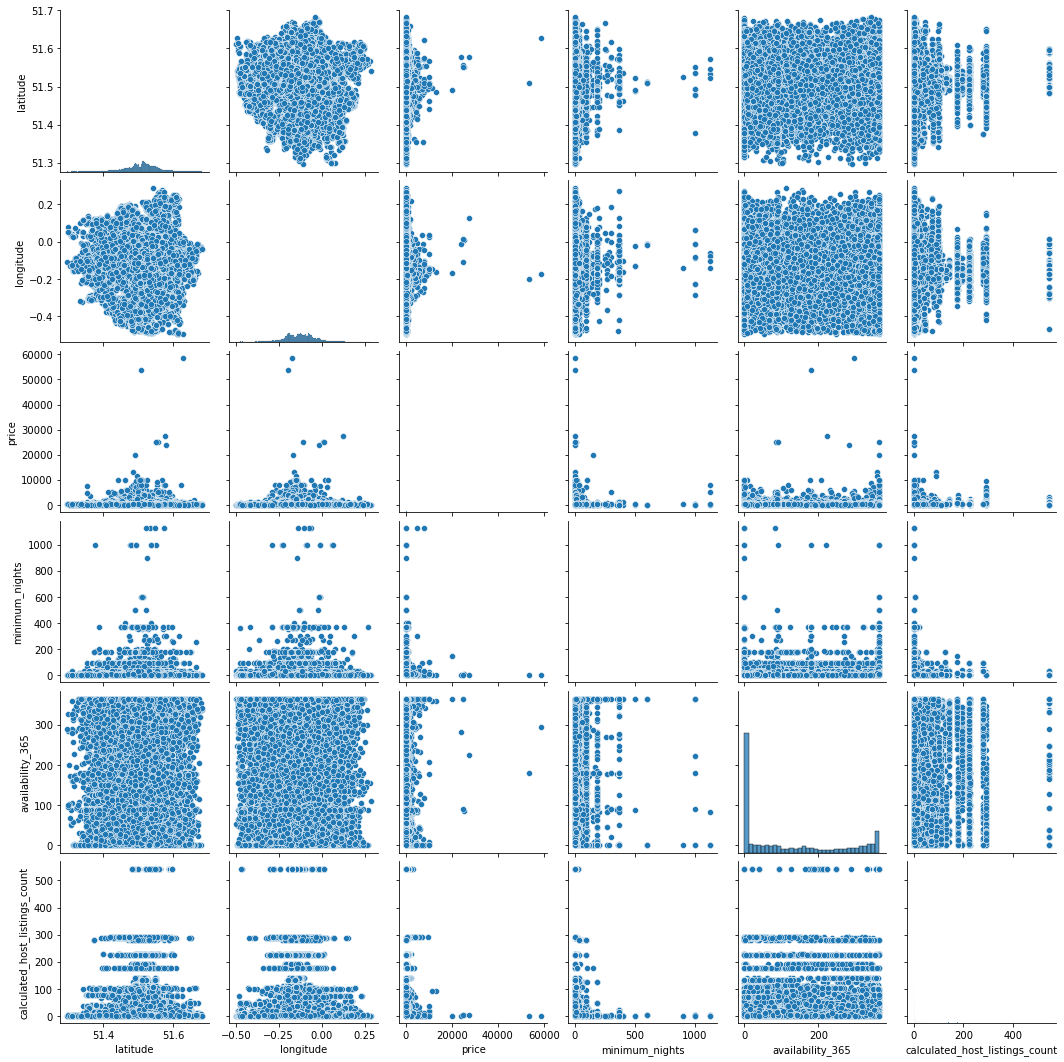

In [15]:
sns.pairplot(df)

######################################################################

#### Neighbourhood

In [16]:
df["neighbourhood"].value_counts()

Westminster               9301
Tower Hamlets             6626
Hackney                   5828
Camden                    5390
Kensington and Chelsea    5374
Southwark                 4710
Islington                 4442
Lambeth                   4431
Wandsworth                4111
Hammersmith and Fulham    3490
Brent                     2586
Lewisham                  2383
Haringey                  2200
Newham                    2092
Barnet                    2048
Ealing                    2039
Greenwich                 1785
Waltham Forest            1552
Croydon                   1378
Merton                    1370
Richmond upon Thames      1158
Hounslow                  1116
Hillingdon                 796
Redbridge                  787
Enfield                    748
Bromley                    703
Kingston upon Thames       636
Barking and Dagenham       524
Harrow                     476
Bexley                     453
City of London             447
Havering                   364
Sutton  

In [17]:
df["neighbourhood"].unique()

array(['Hackney', 'Westminster', 'Barking and Dagenham',
       'Hammersmith and Fulham', 'Islington', 'Kensington and Chelsea',
       'Southwark', 'Lambeth', 'Camden', 'Wandsworth', 'Hillingdon',
       'Tower Hamlets', 'Barnet', 'Richmond upon Thames', 'Greenwich',
       'Haringey', 'Merton', 'Brent', 'Newham', 'Waltham Forest',
       'Hounslow', 'Croydon', 'Lewisham', 'Enfield', 'City of London',
       'Ealing', 'Bromley', 'Havering', 'Harrow', 'Kingston upon Thames',
       'Redbridge', 'Bexley', 'Sutton'], dtype=object)

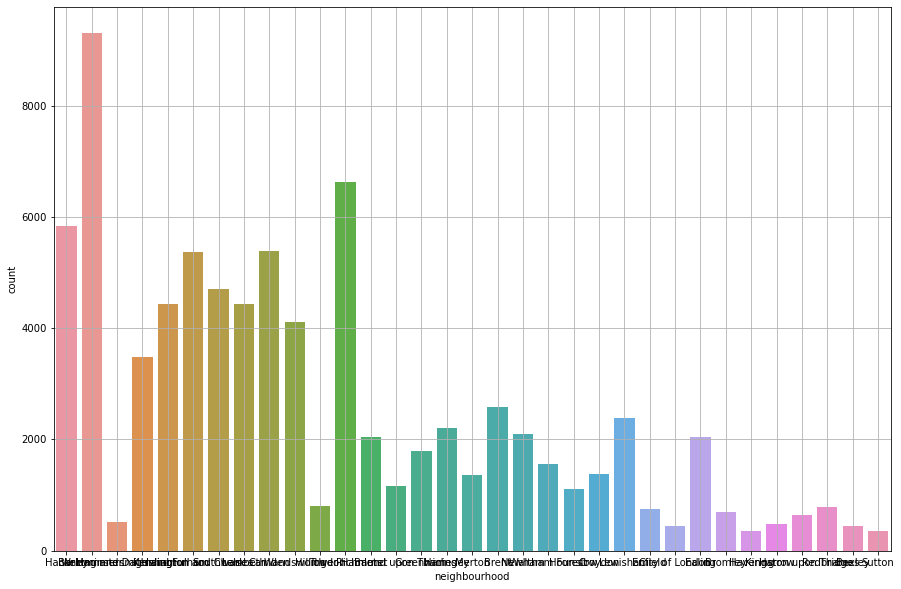

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(x='neighbourhood', data=df)
plt.grid()
plt.show()

#### Room type

In [19]:
df["room_type"].value_counts()

Entire home/apt    50360
Private room       30687
Shared room          412
Hotel room           238
Name: room_type, dtype: int64

In [20]:
df["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

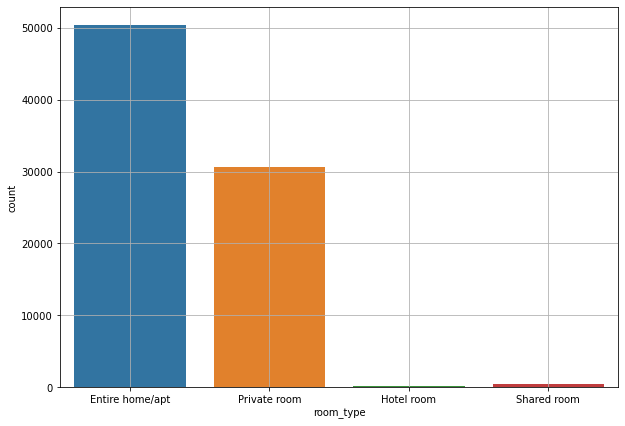

In [21]:
plt.figure(figsize=(10,7))
sns.countplot(x='room_type', data=df)
plt.grid()
plt.show()

#### calculated host listings count

In [22]:
df["calculated_host_listings_count"].value_counts()

1     41184
2     10671
3      4809
4      2889
5      2001
      ...  
59       59
57       57
56       56
54       54
48       48
Name: calculated_host_listings_count, Length: 90, dtype: int64

In [23]:
df["calculated_host_listings_count"].unique()

array([  1,   2,   6,   4,   9,   3,   5,  12,   7,  13,  24,  21,  22,
        10,  23,   8,  44,  11,  43,  78,  14,  82,  17,  95,  27, 101,
        38,  25,  72,  16,  19,  42,  31,  50,  55,  18,  61,  46, 289,
        15, 291,  35,  67,  60,  41,  30,  26,  87,  29,  47,  54, 124,
        20,  70,  33,  59,  28, 106,  91,  48,  32, 193,  49, 177,  53,
        34,  37, 224,  51,  36, 140, 131, 228, 176,  52, 102, 280,  96,
       543, 110,  76,  39,  56,  99, 108,  83,  40,  63,  57, 113],
      dtype=int64)

C:\Users\Majed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='calculated_host_listings_count'>

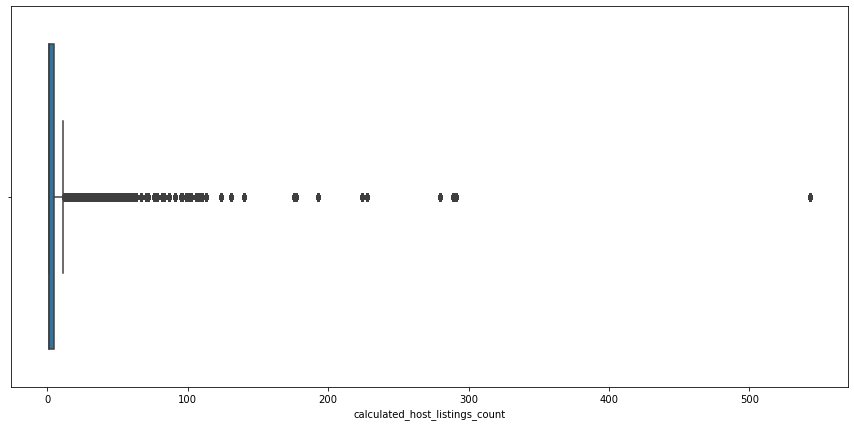

In [24]:
plt.figure(figsize=(15,7))
sns.boxplot(df['calculated_host_listings_count'])

#############################################################

#### The relation between price and  calculated host listings count 

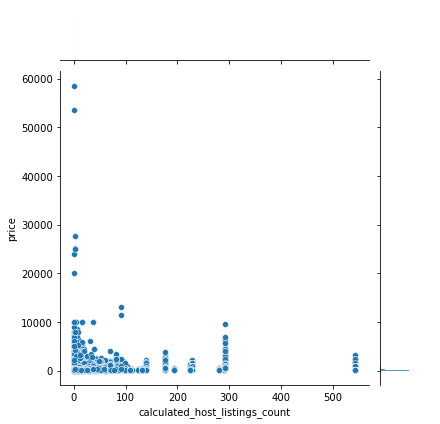

In [25]:
sns.jointplot(x='calculated_host_listings_count', y='price', data=df, kind='scatter')

#### The relation between price,  calculated host listings count and room type

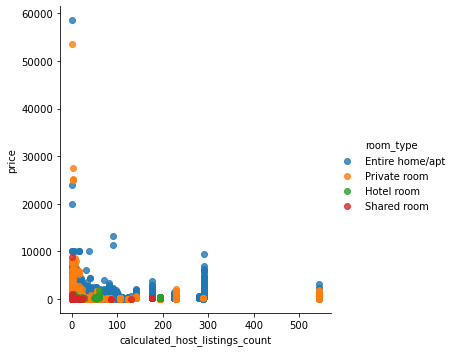

In [26]:
sns.lmplot(x='calculated_host_listings_count', y='price', data=df, hue='room_type', fit_reg=False)

#### The relation between price and  availability of room 

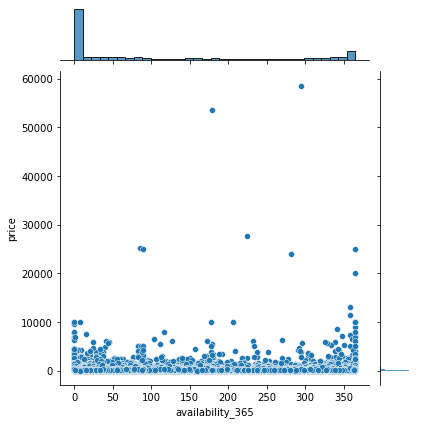

In [27]:
sns.jointplot(x='availability_365', y='price', data=df, kind='scatter')

#### The relation between price, availability of room and room type

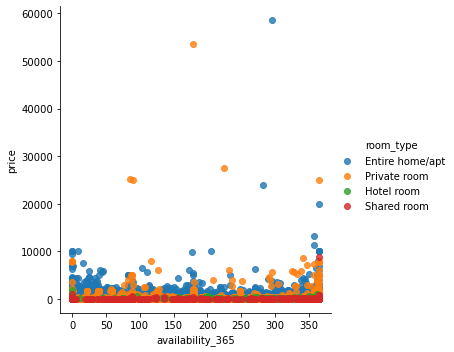

In [28]:
sns.lmplot(x='availability_365', y='price', data=df, hue='room_type', fit_reg=False)

#### The relation between minimum nights and calculated host listings count

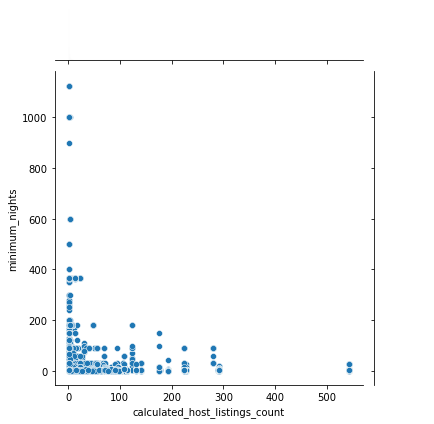

In [29]:
sns.jointplot(x='calculated_host_listings_count', y='minimum_nights', data=df, kind='scatter')

#### The relation between minimum nights, calculated host listings count and room type

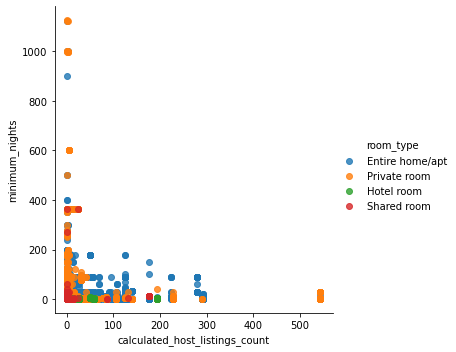

In [30]:
sns.lmplot(x='calculated_host_listings_count', y='minimum_nights', data=df, hue='room_type', fit_reg=False)

#### The relation between minimum nights and availability of room 

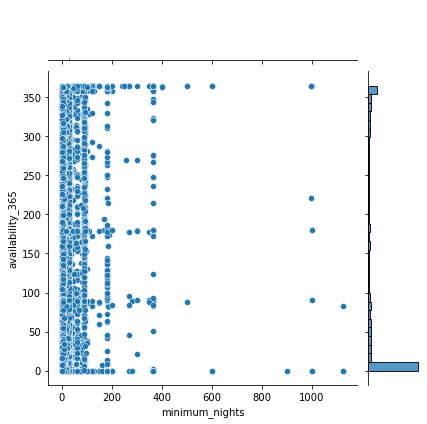

In [31]:
sns.jointplot(x='minimum_nights', y='availability_365', data=df, kind='scatter')

#### The relation between minimum nights, availability of room and room type

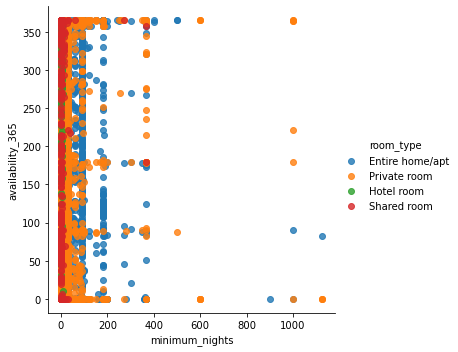

In [32]:
sns.lmplot(x='minimum_nights', y='availability_365', data=df, hue='room_type', fit_reg=False)

#################################################################

#### Map of Neighbourhood

C:\Users\Majed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


C:\Users\Majed\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


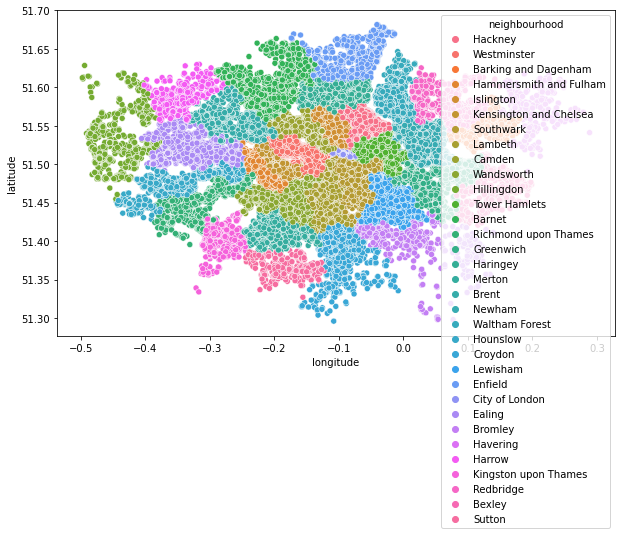

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood)
plt.ioff()

#### Map of Room type

C:\Users\Majed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


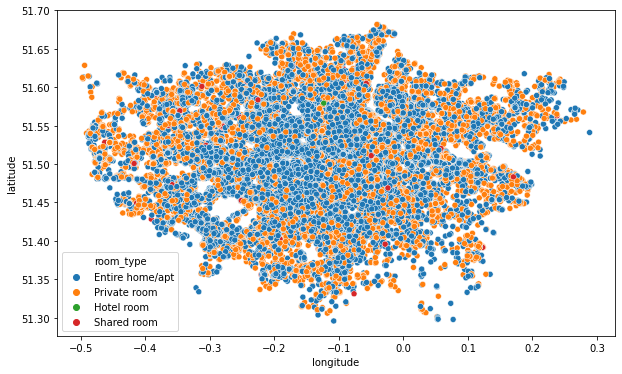

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.room_type)
plt.ioff()

#### Map of Availability of Room

C:\Users\Majed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


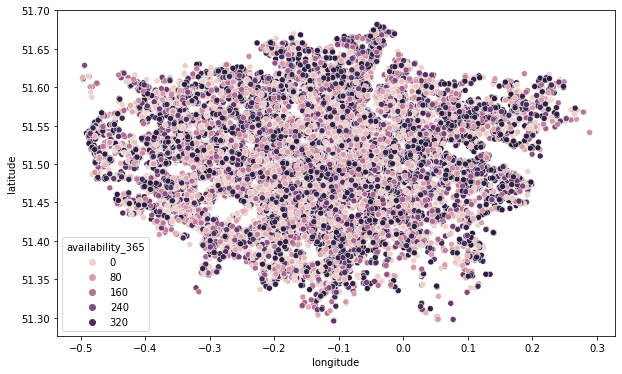

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.availability_365)
plt.ioff()

#### Map of calculated host listings count

C:\Users\Majed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


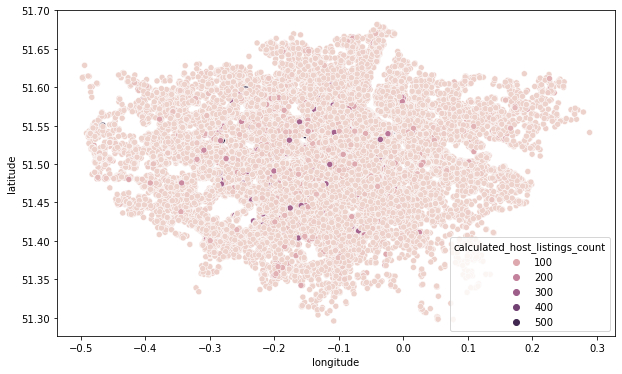

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.calculated_host_listings_count)
plt.ioff()

#### Map of price

C:\Users\Majed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


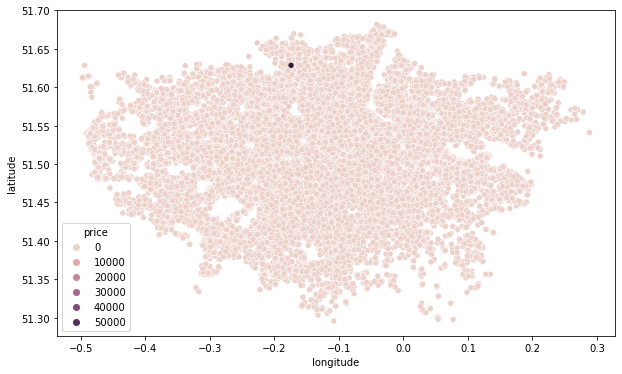

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.price)
plt.ioff()

#### Map of minimum nights

C:\Users\Majed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


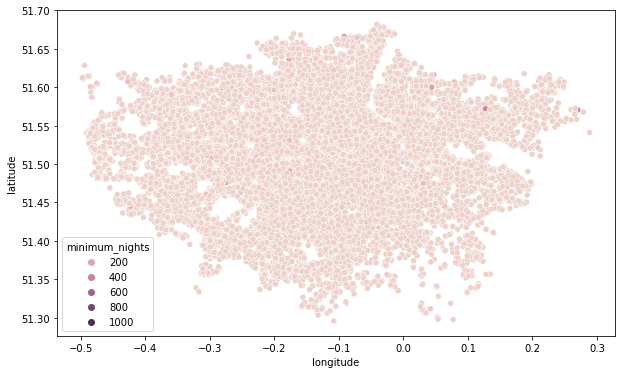

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.minimum_nights)
plt.ioff()